# Ultimate Takehome Challenge

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import calendar

## Load Data

In [4]:
login_data = pd.read_json('logins.json')

# Part 1 - EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular<br>
geographic location. Aggregate these login counts based on 15­minute time intervals, and<br>
visualize and describe the resulting time series of login counts in ways that best characterize the<br>
underlying patterns of the demand. Please report/illustrate important features of the demand,<br>
such as daily cycles. If there are data quality issues, please report them.

In [49]:
login_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.7 KB


In [50]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [51]:
login_data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Groupby 15 Minutes Intervals

In [55]:
# Add a count variable for each entry
login_data['count'] = 1

# Set Datetime to Index
login_data = login_data.set_index('login_time')

In [59]:
# Use Grouper to Count in 15 minute intervals
fifteen_min_int_login = login_data.groupby(pd.Grouper(freq='15Min')).count()

In [76]:
fifteen_min_int_login.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# Get Weekday

In [162]:
# Get weekday
fifteen_min_int_login = fifteen_min_int_login.reset_index()
fifteen_min_int_login.loc[:,'weekday'] = fifteen_min_int_login['login_time'].apply(lambda x: calendar.day_name[x.weekday()])
fifteen_min_int_login.loc[:,'hour'] = fifteen_min_int_login['login_time'].dt.hour

fifteen_min_int_login = fifteen_min_int_login.set_index('login_time')

In [163]:
fifteen_min_int_login.head()

,count,weekday,hour
login_time,,,
1970-01-01 20:00:00,2,Thursday,20
1970-01-01 20:15:00,6,Thursday,20
1970-01-01 20:30:00,9,Thursday,20
1970-01-01 20:45:00,7,Thursday,20
1970-01-01 21:00:00,1,Thursday,21


# Plot Time Series

## Full Dataset

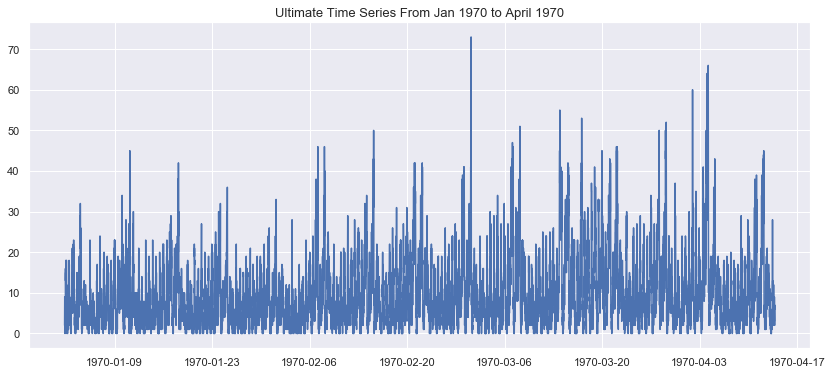

In [212]:
_ = plt.figure(figsize=(14,6))
_ = plt.plot(fifteen_min_int_login['count'])
_ = plt.title('Ultimate Time Series From Jan 1970 to April 1970', size=13)

## January 2019

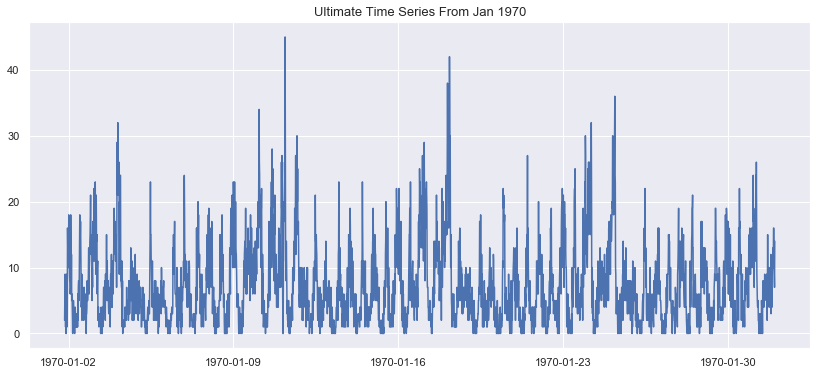

In [221]:
_ = plt.figure(figsize=(14,6))
_ = plt.plot(fifteen_min_int_login.loc['1970-1']['count'])
_ = plt.title('Ultimate Time Series From Jan 1970', size=13)

## One Week

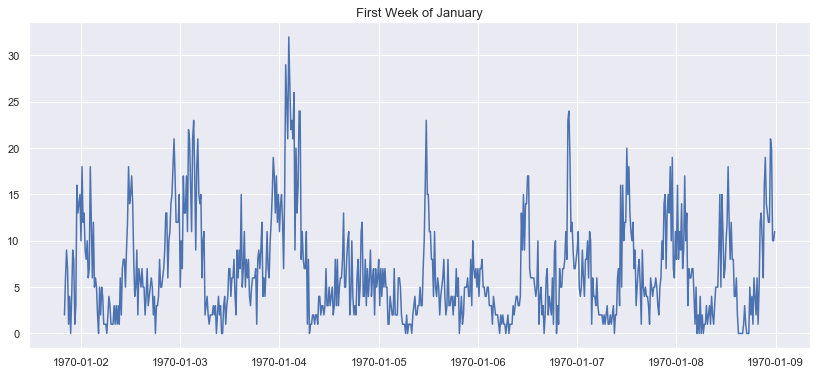

In [223]:
_ = plt.figure(figsize=(14,6))
_ = plt.plot(fifteen_min_int_login['1970-01-01':'1970-01-08']['count'])
_ = plt.title('First Week of January', size=13)

## One Day

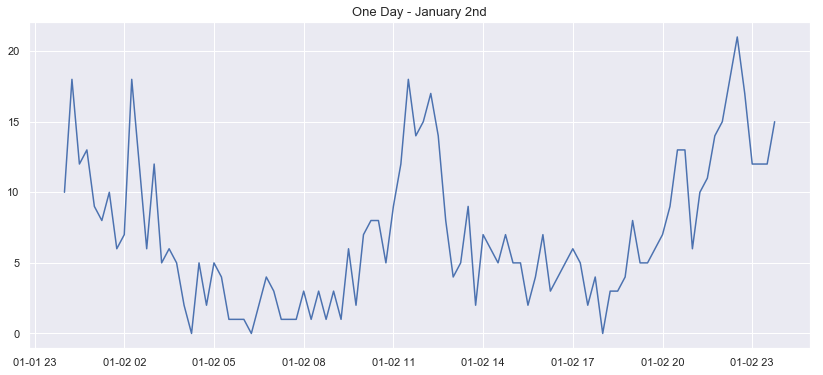

In [225]:
_ = plt.figure(figsize=(14,6))
_ = plt.plot(fifteen_min_int_login['1970-01-02']['count'])
_ = plt.title('One Day - January 2nd', size=13)

# Averages

## By Day of the Week

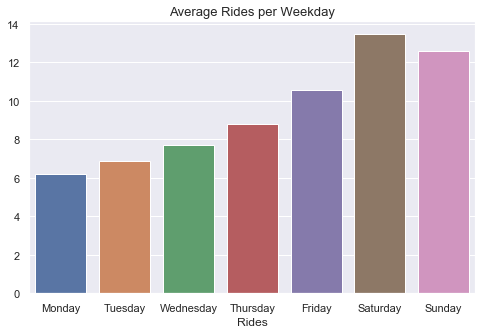

In [203]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

weekday_averages = fifteen_min_int_login.groupby('weekday')[['count']].mean()
weekday_averages = weekday_averages.loc[week_order].reset_index()

_ = plt.figure(figsize=(8,5))
_ = sns.barplot(x='weekday', y='count', data=weekday_averages)
_ = plt.title('Average Rides per Weekday', size=13)
_ = plt.xlabel('Rides')
_ = plt.ylabel('')

## By Hour of the Day

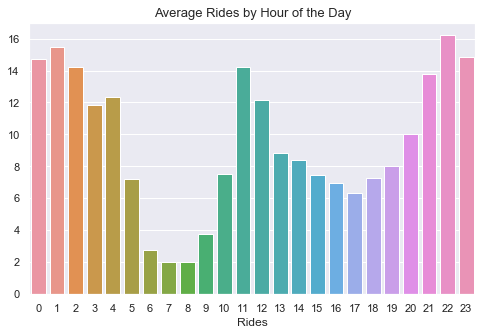

In [202]:
avg_by_hour = fifteen_min_int_login.groupby('hour')[['count']].mean().reset_index()

_ = plt.figure(figsize=(8,5))
_ = sns.barplot(x='hour', y='count', data=avg_by_hour)
_ = plt.title('Average Rides by Hour of the Day', size=13)
_ = plt.xlabel('Rides')
_ = plt.ylabel('')

# Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.


However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key metric that would be best for tracking the success of this experiment is to track the number of Metropolis drivers in Gotham at night and Gotham drivers in Metropolis during the day on weekdays before and after the toll reimbursement.

For drivers at a company like Ultimate the best use of time is to go where the activity is highest (most demand / most riders) as this will mean that they will get the highest pay.  If the toll is really the factor keeping drivers exclusive to each city than a reimbursement should allow/encourage drivers to go where the demand of rides is the highest.  With the circadian rhythm of the two cities this would mean that riders would go to Metropolis during the day and Gotham at night regardless of the city they are from.  For this reason if there is significant change in the number of Gotham drivers in Metropolis during the day and Metropolis drivers in Gotham at night after the implementation fo the new policy than we can conclude that the toll reimbursement was successful in encouraging drivers to drive in both cities.


### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

#### a. how you will implement the experiment?

For the experiment we would need data of driver behavior before and after the implementation of the new policy. The best way to determine if the toll reimbursement is effective in encouraging drivers to drive in both cities is to test whether or not there is a significant difference in driver behavior before and after the policy.

#### b. what statistical test(s) you will conduct to verify the significance of the observation?

I would use bootstrap hypothesis testing to compare difference of means between cross-city driver activity before and after the toll reimbursement policy.

#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I would look for statistical significance above a certain threshold of the difference of means between driver activity. Ideally we would have a significant increase in the cross-city drivers after the reimbursement policy. <br>
To give more specific recommendations or insights it would be interesting to look at the type of drivers who are most likely to change behavior due to the new policy and give city operations a list of drivers most likely to convert who have not yet done so.  Understanding behavior of these drivers could also be beneficial in understand what kind of future drivers would be the most effective to hire.


# Part 3 ‑ Predictive modeling

## Objective
Ultimate is interested in predicting rider retention. 

## Data
To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.


We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

# Load Data

In [5]:
import json

with open('ultimate_data_challenge.json') as f:
   ultimate_data = pd.DataFrame(json.load(f))

In [6]:
ultimate_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


# Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [7]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
ultimate_data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


# Data Cleaning

In [9]:
# Fill Rating by Driver with average
ultimate_data['avg_rating_by_driver'] = ultimate_data['avg_rating_by_driver'].fillna(np.mean(ultimate_data['avg_rating_by_driver']))

# Fill Rating of Driver with average
ultimate_data['avg_rating_of_driver'] = ultimate_data['avg_rating_of_driver'].fillna(np.mean(ultimate_data['avg_rating_of_driver']))

# Fill Phone Type with most frequent
ultimate_data['phone'] = ultimate_data['phone'].fillna('iPhone')

# Questions:

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

<strong>Cleaning:</strong> <br>
There were a few columns with missing values the "avg_rating_by_driver", "avg_rating_of_driver" and "phone" category. I decided the best way to deal with the avg ratings were to use the mean ratings for each value and the most frequent phone type which was the iphone for the phone category missing values.     

<strong>EDA:</strong><br>
Plotting the distribution of the number of trips in the first 30 days shows that the majority of users only made about 0 or 1 trips in the first 30 days.

<strong>Retention Rate:</strong> <br>
The retention rate is about 69.2%.

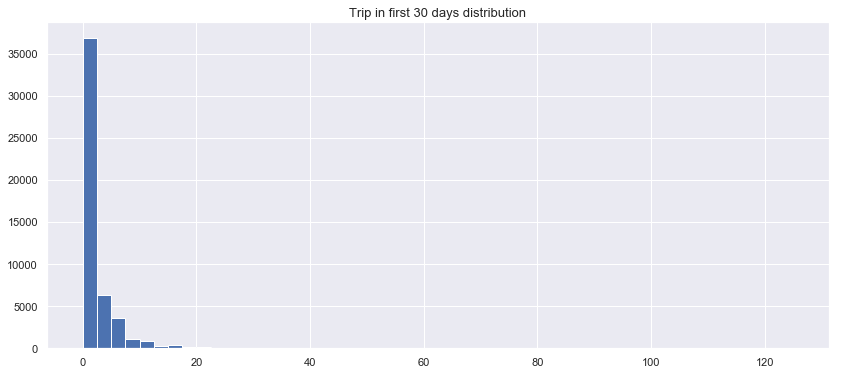

In [10]:
_ = plt.figure(figsize=(14,6))
_ = plt.hist(ultimate_data['trips_in_first_30_days'], bins=50)
_ = plt.title('Trip in first 30 days distribution', size=13)

### Calcualte Retention Rate

In [11]:
# Label if User was Retained or Not
ultimate_data['retained'] = (ultimate_data['trips_in_first_30_days'] > 0).astype(int)

In [12]:
ultimate_data[['trips_in_first_30_days','retained']].head()

,trips_in_first_30_days,retained
0,4,1
1,0,0
2,3,1
3,9,1
4,14,1


In [13]:
retention_count = ultimate_data['retained'].value_counts()
retention_count

1    34610
0    15390
Name: retained, dtype: int64

In [14]:
float(retention_count[1])/float(retention_count.sum())

0.6922

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

<strong>Approach</strong><br>
To predict whether or not a user will be active in their 6th month I will build a Logistic Regression model that will classify a user based on their behavior into either active or not active in their 6th month.

<strong>Alternative Approaches</strong><br>
Other models that could also be used with the same data and method would be an SVM, Random Forest or even Gradient Boosting which could be worth testing as this is a fairly small dataset with few features.  

<strong>Evaluation Metrics (Key Indicators)</strong><br>
The main indicators I will use to evaluate the model are accuracy, precision and recall.  

## Features

All columns will be used as features for the model except for the signup_dates as it is highly unlikely that the day of signup will affect activity in six months.  The last_trip_date will not be used in features but will be used to create the target variable later on.

In [15]:
ultimate_data.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1


In [16]:
NUM_COLS = ['avg_dist','avg_rating_by_driver','avg_rating_of_driver','avg_surge',\
            'surge_pct','trips_in_first_30_days','weekday_pct']

TEXT_COLS = ['city','phone']

BINARY_COLS = ['ultimate_black_user']

# Preprocessing

This can also be done in the actual pipeline but to show the steps I have chosen to do it step by step.

### Add Numeric Data to Features

In [17]:
# Create Feature Data 'X' with numeric data
X = ultimate_data[NUM_COLS]

### Add Text Data to Features

In [18]:
# Text to dummies for model use
text_dummies = pd.get_dummies(ultimate_data[TEXT_COLS])
text_dummies.head(3)

,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,0,1


In [19]:
# Merge Dummies into Feature Data
X = X.merge(text_dummies, left_index=True, right_index=True)

### Add Binary Data to Features

In [20]:
# T/F Data to Binary
binary_data = ultimate_data[BINARY_COLS].astype(int)

In [21]:
binary_data.head(3)

,ultimate_black_user
0,1
1,0
2,0


In [22]:
# Merge Binary Data into Features
X = X.merge(binary_data, left_index=True, right_index=True)

## Final Features Data

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
ultimate_black_user       50000 non-null int64
dtypes: float64(6), int64(2), uint8(5)
memory usage: 3.3 MB


In [24]:
X.shape

(50000, 13)

In [25]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,0


# Target Variables

In [101]:
# Text to Datetimes
ultimate_data['last_trip_date'] = pd.to_datetime(ultimate_data['last_trip_date'])

# Create Target Variable: Used Ultimate in six months or not (Binary)
ultimate_data['target'] = (ultimate_data['last_trip_date'].dt.month == 6).astype(int)

In [95]:
# Define Target
y = ultimate_data['target']

In [96]:
y.shape

(50000,)

In [97]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

# Build the Predictive Model

In [92]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Logistic Regression

In [85]:
# Initialize LogReg Modelf
logreg = LogisticRegression()

# Fit Model
logreg.fit(X_train, y_train)

# Score Model
logreg.score(X_test, y_test)

0.7135333333333334

## 2. SVM

In [134]:
# Build Pipeline
pl = Pipeline([('sclr', StandardScaler()),
                     ('svm', SVC())])

# Fit Pipeline
pl.fit(X_train, y_train)

# Score Pipeline
pl.score(X_test, y_test)

0.7634666666666666

## 3. Gradient Boosting Classifier

In [136]:
# Initialize GradientBoosting Modelf
gbc = GradientBoostingClassifier()

# Fit Model
gbc.fit(X_train, y_train)

# Score Model
gbc.score(X_test, y_test)

0.7827333333333333

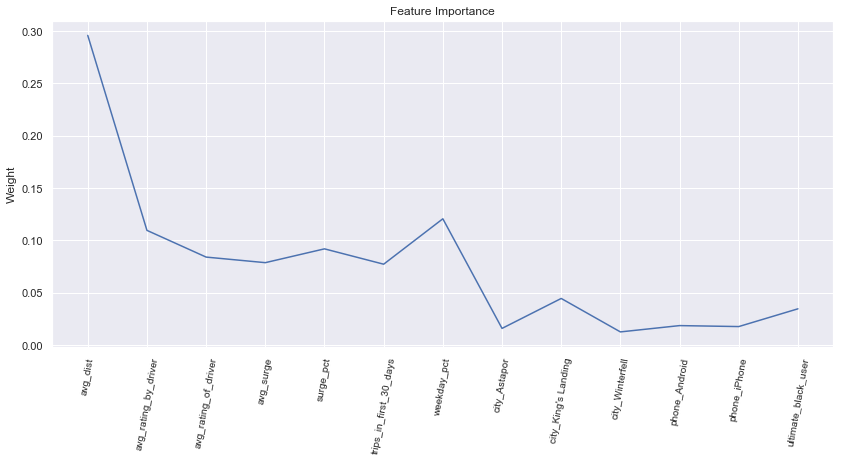

In [131]:
feature_weights = gbc.feature_importances_
feature_names = X.columns

_ = plt.figure(figsize=(14,6))
_ = plt.plot(range(len(feature_names)), feature_weights)
_ = plt.xticks(range(len(feature_names)), feature_names, rotation=80, size=10)
_ = plt.title('Feature Importance')
_ = plt.ylabel('Weight')
plt.show()

# Evaluation

- Accuracy
- Precision/Recall
- Confusion Matrix

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def evaluation(model):
    predictions = model.predict(X_test)
    
    #Cross Validation Score
    cv_results = cross_val_score(model, X_test, y_test, cv=5)
    print("Average CV Score: " + str(cv_results.mean()))
    
    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y_test, predictions))

    #Confusion Matrix
    print('Confusion Matrix: \n')
    print(confusion_matrix(y_test, predictions))

## a. LogReg Evaluation

In [81]:
evaluation(logreg)

Average CV Score: 0.7119993298739996

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      9522
           1       0.65      0.47      0.54      5478

   micro avg       0.71      0.71      0.71     15000
   macro avg       0.69      0.66      0.67     15000
weighted avg       0.70      0.71      0.70     15000

Confusion Matrix: 

[[8134 1388]
 [2909 2569]]


## b. SVM Evaluation

In [80]:
evaluation(pl)

Average CV Score: 0.7533334446370494

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      9522
           1       0.71      0.57      0.63      5478

   micro avg       0.76      0.76      0.76     15000
   macro avg       0.74      0.72      0.73     15000
weighted avg       0.75      0.76      0.75     15000

Confusion Matrix: 

[[8249 1273]
 [2359 3119]]


## c. GradientBoostingClassifier

In [137]:
evaluation(gbc)

Average CV Score: 0.7828668791555792

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      9379
           1       0.73      0.66      0.70      5621

   micro avg       0.78      0.78      0.78     15000
   macro avg       0.77      0.76      0.76     15000
weighted avg       0.78      0.78      0.78     15000

Confusion Matrix: 

[[8012 1367]
 [1892 3729]]


## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

The model is able to tell us who is most likely to remain a user longterm.  From the logistic regression feature weights plot we see that city, phone, and ultimate black user seem to have an impact on the results while others did not carry as much weight.  One approach could be to target riders and provide incentives to those who have a higher retention probability as it would improve overall retention.